In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dharmayadagani","key":"d6b2b61dcd53c9ea955c8d607c1fd55d"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d viditgandhi/tree-species-identification-dataset

Dataset URL: https://www.kaggle.com/datasets/viditgandhi/tree-species-identification-dataset
License(s): apache-2.0
  0% 0.00/72.8M [00:00<?, ?B/s]
100% 72.8M/72.8M [00:00<00:00, 1.23GB/s]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp tree-species-identification-dataset.zip /content/drive/MyDrive/

In [9]:
!unzip /content/drive/MyDrive/tree-species-identification-dataset.zip -d /content/drive/MyDrive/

Archive:  /content/drive/MyDrive/tree-species-identification-dataset.zip
replace /content/drive/MyDrive/Tree_Species_Dataset/.git/HEAD? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:

import os
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
!ls /content/drive/MyDrive

 Classroom		  project.ipynb
'dl lab'		  Tree_Species_Dataset
 linearregression.ipynb   tree-species-identification-dataset.zip
'NLP Lab'


In [12]:
data_path = "/content/drive/MyDrive/Tree_Species_Dataset"


In [13]:
import os
class_names = os.listdir(data_path)
class_names = [folder for folder in class_names if os.path.isdir(os.path.join(data_path, folder))]

print("Available Tree Species (Classes):")
print(class_names)


Available Tree Species (Classes):
['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [14]:
for class_name in class_names:
  folder_path=os.path.join(data_path,class_name)
  size=len(os.listdir(folder_path))
  print(f"Class: {class_name}\t\tSize: {size}")


Class: .git		Size: 5
Class: amla		Size: 50
Class: asopalav		Size: 50
Class: babul		Size: 50
Class: bamboo		Size: 50
Class: banyan		Size: 50
Class: bili		Size: 50
Class: cactus		Size: 50
Class: champa		Size: 50
Class: coconut		Size: 50
Class: garmalo		Size: 50
Class: gulmohor		Size: 50
Class: gunda		Size: 50
Class: jamun		Size: 50
Class: kanchan		Size: 50
Class: kesudo		Size: 50
Class: khajur		Size: 50
Class: mango		Size: 50
Class: motichanoti		Size: 50
Class: neem		Size: 50
Class: nilgiri		Size: 50
Class: other		Size: 150
Class: pilikaren		Size: 50
Class: pipal		Size: 50
Class: saptaparni		Size: 50
Class: shirish		Size: 50
Class: simlo		Size: 50
Class: sitafal		Size: 50
Class: sonmahor		Size: 50
Class: sugarcane		Size: 50
Class: vad		Size: 50


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [33]:
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [35]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)



In [44]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 463ms/step - accuracy: 0.3720 - loss: 2.0846 - val_accuracy: 0.3969 - val_loss: 2.2118
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 417ms/step - accuracy: 0.3648 - loss: 2.1543 - val_accuracy: 0.3594 - val_loss: 2.2078
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 411ms/step - accuracy: 0.4011 - loss: 2.0152 - val_accuracy: 0.3406 - val_loss: 2.3322
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 408ms/step - accuracy: 0.3764 - loss: 2.1105 - val_accuracy: 0.3875 - val_loss: 2.2888
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 408ms/step - accuracy: 0.4125 - loss: 1.9660 - val_accuracy: 0.3250 - val_loss: 2.2839
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 405ms/step - accuracy: 0.4186 - loss: 1.9437 - val_accuracy: 0.4094 - val_loss: 2.1985
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 405ms/step - accuracy: 0.3977 - loss: 2.0042 - val_accuracy: 0.4094 - val_loss: 2.1222
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 403ms/step - accuracy: 0.4266 - loss: 1.9844 - val_accu

In [47]:
model.save("tree_species_model.h5")

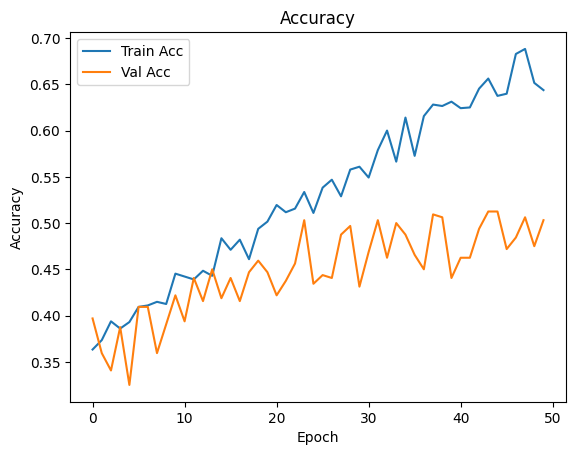

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
from google.colab import files
files.download('tree_species_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>